In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [25]:
'upload scores and features (# params, # layers, ...) for all models'

## BERT models
BERT_par = [4.4e6, 11.3e6, 29.1e6, 41.7e6, 110e6, 340e6, 340e6, 66e6]
BERT_zetas = []
BERT_norm = []
with open('../../_data/fig_zetas/BERT.pkl', 'rb') as file:
    models = pickle.load(file)

for key in list(models.keys()):
    for j in models[key][-2].flatten().flatten():
        BERT_zetas.append(j)
    for j in models[key][-1].flatten().flatten():
        BERT_norm.append(j)

## GPT models
GPT_par = [110e6, 117e6, 345e6, 774e6, 1558e6, 82e6]
with open('../../_data/fig_zetas/GPT.pkl', 'rb') as file:
    models = pickle.load(file)
GPT_zetas = []
GPT_norm = []
for key in list(models.keys()):
    for j in models[key][-2].flatten().flatten():
        GPT_zetas.append(j)
    for j in models[key][-1].flatten().flatten():
        GPT_norm.append(j)

BERT_norm = np.array(BERT_norm)
BERT_zetas = np.array(BERT_zetas)

GPT_norm = np.array(GPT_norm)
GPT_zetas = np.array(GPT_zetas)

Text(0.5, 0, '# parameters')

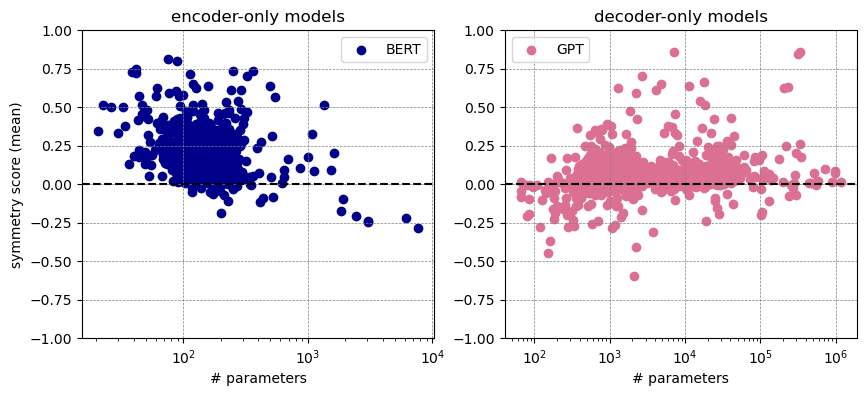

In [52]:
"""
mean symmetry scores (across layers and heads) as a function of total # parameters
"""

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)

## encoder-only models
plt.scatter(BERT_norm,BERT_zetas / BERT_norm, color='darkblue', label='BERT')

plt.title('encoder-only models')
plt.axhline(y=0,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.ylim(-1,1)
plt.ylabel('symmetry score (mean)')
plt.xlabel('# parameters')
# plt.xlim(1e5,10e10)

plt.subplot(1,2,2)

## decoder-only models
plt.scatter(GPT_norm,GPT_zetas / GPT_norm,color='palevioletred', label='GPT')

plt.title('decoder-only models')
plt.axhline(y=0,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.ylim(-1,1)
plt.xlabel('# parameters')
# plt.xlim(1e5,10e10)